# Parcial 2: Métodos Computacionales 
## Gabriel Cataño Sánchez
### CC: 1039474879


## Enunciado

A) Los siguientes datos fueron extraidos de un [perfil real de Instragram](https://www.instagram.com/paulacano24/):

https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/Followers.json

Interprete los datos como un problema de caida libre y a partir del ajuste (fit) a la correspondiente ecuación de movimiento, determine
1. La velocidad inicial de incremento de seguidores en `followers/hour`
1. La aceleración constante en `followers/hour**2`
1. El número máximo de seguidores que alcanzaría el perfil
1. La fecha en la que se alcanzaría dicho máximo

B) El período de  un pendulo de longitud $l$ oscilando a ángulos grandes  $\alpha$, está dado por
$$
T=T_{0} \frac{\sqrt{2}}{\pi} \int_{0}^{\alpha} \frac{d \theta}{(\cos \theta-\cos \alpha)^{\frac{1}{2}}}
$$
donde
$$
T_{0}=2 \pi \sqrt{\frac{l}{g}}
$$
es el período del mismo péndulo a pequeñas amplitudes. Culquier intento de evaluación numérico de esa integral debería fallar. Sin embargo, si hacemos el cambio de variable
$$
\sin \frac{\theta}{2}=\sin \frac{\alpha}{2} \sin \phi
$$
obtenemos
$$
T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$
que corresponde a una integral bien comportada. 
1. Escriba un programa que use la anterio integral para calcular el cociente  $T/T_0$ para ángulos enteros (en grados) $0^\circ \le\alpha \le 90^\circ$.  
1. Genere un DataFrame de pandas que contenga como columnas: la amplitud en grados, la amplitud en radianes, y el cociente $T/T_0$, 
1. Haga un gráfico de $T/T_0$ como función de $\alpha$ (en grados). 
1. Explain the result when $\alpha = 0.$ 

## Solución

In [66]:
# Librerías

import numpy as np
from scipy import optimize
import scipy.integrate as integrate
import sympy as sm
import matplotlib.pylab as plt
from scipy import misc
from scipy import interpolate
import pandas as pd
from IPython.display import display, Markdown, Latex, Image

%pylab inline 

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['fmax', 'plt', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Punto A

In [100]:
#Lectura del archivo Json

path = 'https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/Followers.json'
df = pd.read_json(path)
df.tail()

,followers,date_time,hours
615,47452,2021-09-02 12:29:21.834,686.374491
616,47486,2021-09-02 19:59:32.801,693.877537
617,47491,2021-09-02 20:59:50.542,694.882465
618,47493,2021-09-02 21:59:59.345,695.884910
619,47498,2021-09-02 23:00:11.350,696.888245


In [12]:
#Dataframe con los datos

d = pd.DataFrame()
d['F'], d['Dt'], d['H'] = df['followers'], df['date_time'], df['hours']
d.head()

,F,Dt,H
0,42696,2021-08-04 22:06:53.668,0.000000
1,42706,2021-08-04 23:06:56.517,1.000791
2,42716,2021-08-05 00:06:59.505,2.001621
3,42734,2021-08-05 01:07:02.174,3.002363
4,42749,2021-08-05 02:07:04.854,4.003107


No handles with labels found to put in legend.


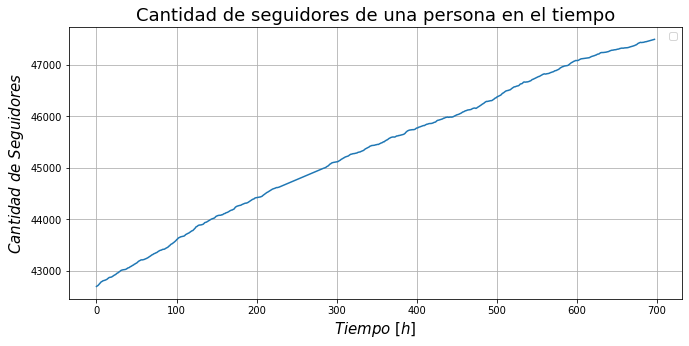

In [29]:
#Gráfica de los Datos

plt.figure(figsize=(11,5))
plt.plot(d['H'], d['F'])
plt.title('Cantidad de seguidores de una persona en el tiempo', size = 18)
#plt.plot(d['H'][-1], d['F'][-1], label = 'Máximo de seguidores: ')
plt.xlabel('$Tiempo$ $[h]$', size=15)
plt.ylabel('$Cantidad$ $de$ $Seguidores$',size=15)
plt.legend()
plt.grid()

In [71]:
#Fit de los datos a la función de caída libre

def caida(t,v0,a):
  y0 = d['F'][0]
  return  y0 + v0*t + 0.5*a*t**2

f = optimize.curve_fit(caida,d['H'],d['F'])
f

(array([ 8.92949874e+00, -5.78649788e-03]),
 array([[ 4.24172555e-04, -1.52471160e-06],
        [-1.52471160e-06,  5.80284854e-09]]))

$h(t)$


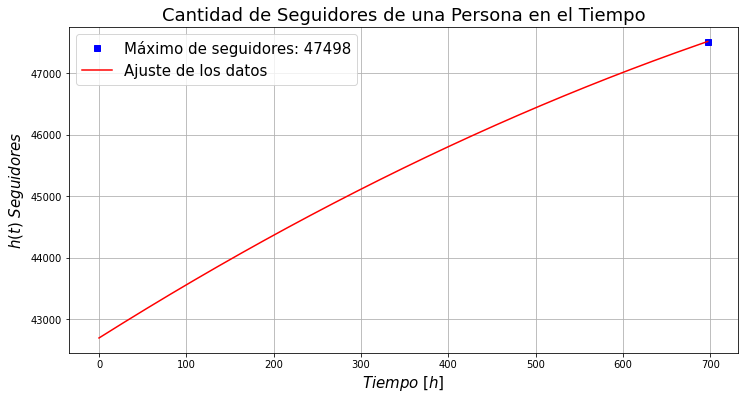

In [52]:
#Gráfica inicial de los datos con el fit

def h(t):
  y0 = d['F'][0]
  v0 = f[0][0]
  a = f[0][1]
  return y0 + v0*t + 0.5*a*t**2

fmax = d['F'].iloc[-1]
hmax = d['H'].iloc[-1]
t_ = np.linspace(0,hmax,1000)

plt.figure(figsize=(12,6))
plt.plot(hmax,fmax, 'sb', label = f'Máximo de seguidores: {fmax}')
plt.plot(t_ , h(t_),'r', label = 'Ajuste de los datos')
plt.title('Cantidad de Seguidores de una Persona en el Tiempo', size = 18)
plt.xlabel('$Tiempo$ $[h]$', size = 15)
plt.ylabel('$h(t)$ $Seguidores$', size = 15)
plt.legend(fontsize = 15)
plt.grid()



In [74]:
#Interpolación de los valores obtenidos con el fit

y0 = d['F'][0]
v0 = f[0][0]
a_ = f[0][1]/2
p = np.poly1d([a_,v0,y0], variable='t')
print('Función que describe el modelo:\n',p)

Ecuación que describe el modelo:
            2
-0.002893 t + 8.929 t + 4.27e+04


In [95]:
#Derivada y segunda derivada para saber los puntos críticos y si es máximo o mínimo.

dp = p.deriv()
ddp = dp.deriv()
roots = optimize.newton(dp,hmax)
print('Derivada de la función:\n',dp)
print('\n Raíces de la derivada:\n', roots)
print('\n Para saber si la raíz es un máximo o un mínimo: \n', ddp(roots))

Derivada de la función:
  
-0.005786 x + 8.929

 Raíces de la derivada:
 1543.1611530168045

 Para saber si la raíz es un máximo o un mínimo: 
 -0.005786497877538288


Por lo tanto tenemos que $h(t)$ alcanza un máximo global en $t \approx 1543$ horas.

In [109]:
#Para saber la cantidad de tiempo en la que se alcanzará el maximo.

seg_max = h(roots)
time_max = roots - d['H'].iloc[-1]
tm_d  = roots/24
tm_sm = roots/(24*7*4)
tmm_d = time_max/24
tmm_sm = time_max/(24*7*4)

print(f'Velocidad de cresimiento de seguidores: {round(f[0][0],4)} seguidores/hora')
print(f'Aceleración de cresimiento de seguidores: {round(f[0][1],5)} seguidores/hora^2')
print(f'Cantidad Máxima de seguidores: {round(seg_max,3)} personas')
print(f'Tiempo desde el comienzo para alcanzar el máximo de seguidores: {round(roots,1)} horas')
print(f'Días desde el comienzo para alcanzar el máximo de seguidores: {round(tm_d,1)} días')
print(f'Meses desde el comienzo para alcanzar el máximo de seguidores: {round(tm_sm,1)} meses')
print(f'Días dede la última toma de datos para alcanzar el máximo de seguidores: {round(tmm_d,1)}')

Velocidad de cresimiento de seguidores: 8.9295 seguidores/hora
Aceleración de cresimiento de seguidores: -0.00579 seguidores/hora^2
Cantidad Máxima de seguidores: 49585.828 personas
Tiempo desde el comienzo para alcanzar el máximo de seguidores: 1543.2 horas
Días desde el comienzo para alcanzar el máximo de seguidores: 64.3 días
Meses desde el comienzo para alcanzar el máximo de seguidores: 2.3 meses
Días dede la última toma de datos para alcanzar el máximo de seguidores: 35.3


Fecha en la que se alcanzará el máximo de seguidores: Octubre 7, 2021.

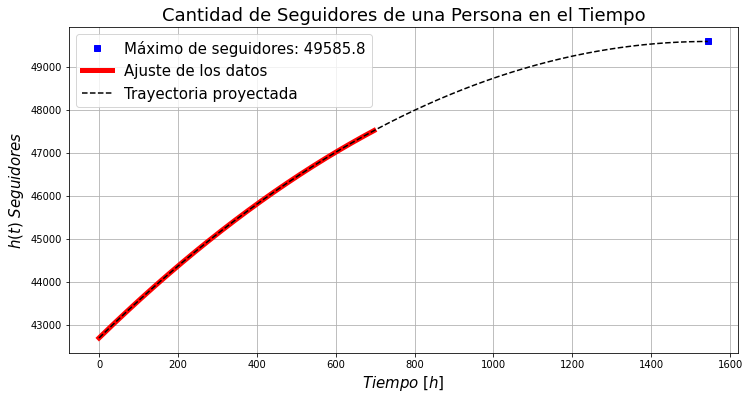

In [135]:
#Gráfica final con los datos obtenidos y la proyección de los seguidores

def h(t):
  y0 = d['F'][0]
  v0 = f[0][0]
  a = f[0][1]
  return y0 + v0*t + 0.5*a*t**2

fmax1 = round(seg_max,1)
hmax1 = roots
tt_ = np.linspace(0,hmax1,1000)

plt.figure(figsize=(12,6))
plt.plot(hmax1,fmax1, 'sb', label = f'Máximo de seguidores: {fmax1}')
plt.plot(t_ , h(t_),'r', linewidth = 5,label = 'Ajuste de los datos')
plt.plot(tt_ , h(tt_),'k--', label = 'Trayectoria proyectada')
plt.title('Cantidad de Seguidores de una Persona en el Tiempo', size = 18)
plt.xlabel('$Tiempo$ $[h]$', size = 15)
plt.ylabel('$h(t)$ $Seguidores$', size = 15)
plt.legend(fontsize = 15)
plt.grid()

## Punto B

El período de  un pendulo de longitud $l$ oscilando a ángulos grandes  $\alpha$, está dado por
$$
T=T_{0} \frac{\sqrt{2}}{\pi} \int_{0}^{\alpha} \frac{d \theta}{(\cos \theta-\cos \alpha)^{\frac{1}{2}}}
$$
donde
$$
T_{0}=2 \pi \sqrt{\frac{l}{g}}
$$
es el período del mismo péndulo a pequeñas amplitudes. Culquier intento de evaluación numérico de esa integral debería fallar. Sin embargo, si hacemos el cambio de variable
$$
\sin \frac{\theta}{2}=\sin \frac{\alpha}{2} \sin \phi
$$
obtenemos
$$
T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$
que corresponde a una integral bien comportada. 
1. Escriba un programa que use la anterio integral para calcular el cociente  $T/T_0$ para ángulos enteros (en grados) $0^\circ \le\alpha \le 90^\circ$.  
1. Genere un DataFrame de pandas que contenga como columnas: la amplitud en grados, la amplitud en radianes, y el cociente $T/T_0$, 
1. Haga un gráfico de $T/T_0$ como función de $\alpha$ (en grados). 
1. Explain the result when $\alpha = 0.$ 

In [162]:
#Cálculo de la integral

def Periodo(alpha,phi):
  
  T1 = 2/(np.pi*np.sqrt(1- (np.sin(alpha/2))**2 *(np.sin(phi)**2)))

  return integrate.simps(T1)

N = 100 # Numero o resolución en alpha y phi
alpha = np.linspace(0, np.pi/2, N)
phi = np.linspace(0, np.pi/2, N)

T = np.zeros(len(alpha))

for i, t in enumerate(alpha):
    T[i] = Periodo(t,phi)


In [153]:
#Datos en u dataframe, anfulos en grados y en radianes, razón entre T y T0
al = alpha
ald = np.rad2deg(al)
Data = {'Grados': ald, 'rad': al, 'T/T0': T}
D = pd.DataFrame(Data)
D

,Grados,rad,T/T0
0,0.000000,0.000000,63.025357
1,0.909091,0.015867,63.026349
2,1.818182,0.031733,63.029324
3,2.727273,0.047600,63.034284
4,3.636364,0.063467,63.041228
...,...,...,...
95,86.363636,1.507330,73.349256
96,87.272727,1.523196,73.603050
97,88.181818,1.539063,73.861283
98,89.090909,1.554930,74.124033


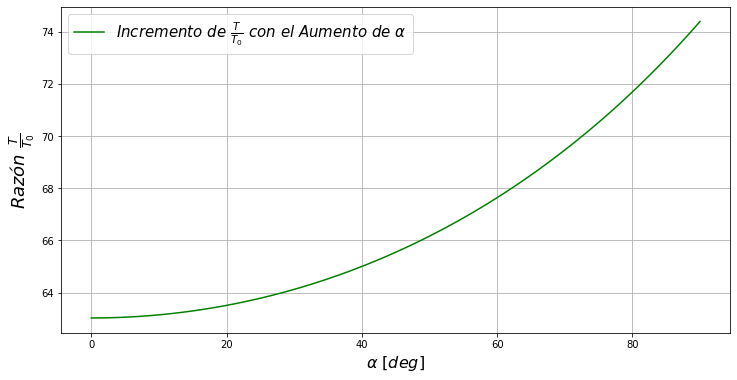

In [168]:
#Grafica de la razón vs alpha
plt.figure(figsize=(12,6))
plt.plot(D['Grados'],D['T/T0'],'g-', label='$Incremento$ $de$ $\\frac{T}{T_{0}}$ $con$ $el$ $Aumento$ $de$ $\\alpha$')
plt.xlabel('$\\alpha$ $[deg]$',size = 16)
plt.ylabel('$Razón$ $\\frac{T}{T_{0}}$', size = 18)
plt.legend(fontsize=15)
plt.grid()

Cuando $\alpha = 0$:
\begin{align}
 {\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}} =& 1
 \end{align}
 Luego queda una integral de una constante entre $0$ y $\frac{\pi}{2}$, esto da como resultado: $\frac{\pi}{2}$. Por lo tanto al final:
\begin{align}
T=& \frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}} =&T_{0}
\end{align}
En conclusión, podemos decir que cuando $\alpha=0$, el periodo es el periodo inicial para pequeñas amplitudes, éste es diferente de cero e igual a $63.02s$.